# Some statistic for top.committer

By [Xin (Daniel) Feng](https://danielslab.dev/)

## Data Preparation

In [33]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt

FILE_NAME : str = "data.csv"
refetch : bool = False

def load_data(retry : int) -> DataFrame:
    global refetch

    if (retry <= 0):
        raise Exception("Failed to load data after multiple attempts.")

    try:
        if refetch:
            refetch = False
            raise Exception("Forcing re-fetch.")

        return pd.read_csv(FILE_NAME)
    except Exception:
        from top_committer_fetcher import fetcher
        fetcher()
        return load_data(retry - 1)

df = load_data(3)
df.head()

,country,rank_type,user_id,contribs
0,Afghanistan,commit,Nasratullah-Shafiq,3713
1,Afghanistan,commit,MastooraTurkmen,2044
2,Afghanistan,commit,Hussain-hamim,1972
3,Afghanistan,commit,sulaimanQasimi,1652
4,Afghanistan,commit,WiyarAhmadZai,1478


## Data Cleaning

In [34]:
# Check outliers
df.isnull().sum()

country      0
rank_type    0
user_id      0
contribs     0
dtype: int64

In [35]:
df.sort_values(by="contribs", ascending=False, inplace=True)
df.head(20)

,country,rank_type,user_id,contribs
6656,Azerbaijan,private,qabilm,111986481
6400,Azerbaijan,public,qabilm,111986481
6144,Azerbaijan,commit,qabilm,111986480
77463,Philippines,private,0x3EF8,20456296
77207,Philippines,public,0x3EF8,20456085
76951,Philippines,commit,0x3EF8,20456060
77464,Philippines,private,eru123,15945918
77208,Philippines,public,eru123,15944563
76952,Philippines,commit,eru123,15944559
77465,Philippines,private,xiv3r,6292446


In [36]:
df.tail(20)

,country,rank_type,user_id,contribs
98532,The Bahamas,commit,ShoneNairn,0
98531,The Bahamas,commit,manerpuyawan,0
98530,The Bahamas,commit,snsmith92,0
98529,The Bahamas,commit,a9eesh,0
98528,The Bahamas,commit,byabbie,0
98526,The Bahamas,commit,daninthiaf,0
98513,The Bahamas,commit,IndyZR,0
98525,The Bahamas,commit,VedaBeans,0
98524,The Bahamas,commit,FEMSTEM242,0
98523,The Bahamas,commit,ManInTheSky,0


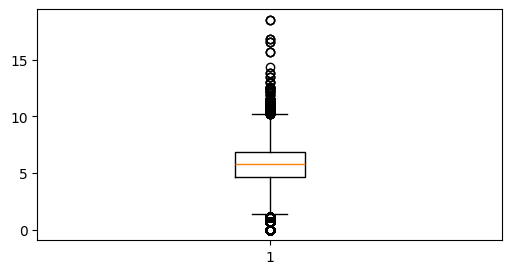

In [37]:
import numpy as np

plt.figure(figsize=(6, 3))
plt.boxplot(np.log1p(df["contribs"]), vert=True)
plt.show()

Removed 8465 outliers


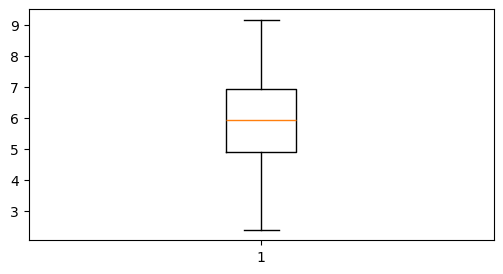

In [38]:
q1 = df["contribs"].quantile(0.25)
q3 = df["contribs"].quantile(0.75)
iqr = q3 - q1

lower = 10
upper = q3 + 10 * iqr

filtered = df[(df["contribs"] >= lower) & (df["contribs"] <= upper)]
print(f"Removed {len(df) - len(filtered)} outliers")

plt.figure(figsize=(6, 3))
plt.boxplot(np.log1p(filtered["contribs"]), vert=True)
plt.show()

## Statistic

In [39]:
# Use contributes among all repos
all = filtered[filtered["rank_type"] == "private"].sort_values(by="contribs", ascending=False)
all.head()

,country,rank_type,user_id,contribs
77477,Philippines,private,kermage,9504
105889,United States,private,josh,9498
19658,China,private,zhw2590582,9495
46756,Japan,private,sile,9478
93590,Sweden,private,Lauszus,9471


The top country is Japan with an average of 3955.76 contributions.
The bottom country is South Sudan with an average of 21.00 contributions.
Finland is ranked #27 in average contributions per country.


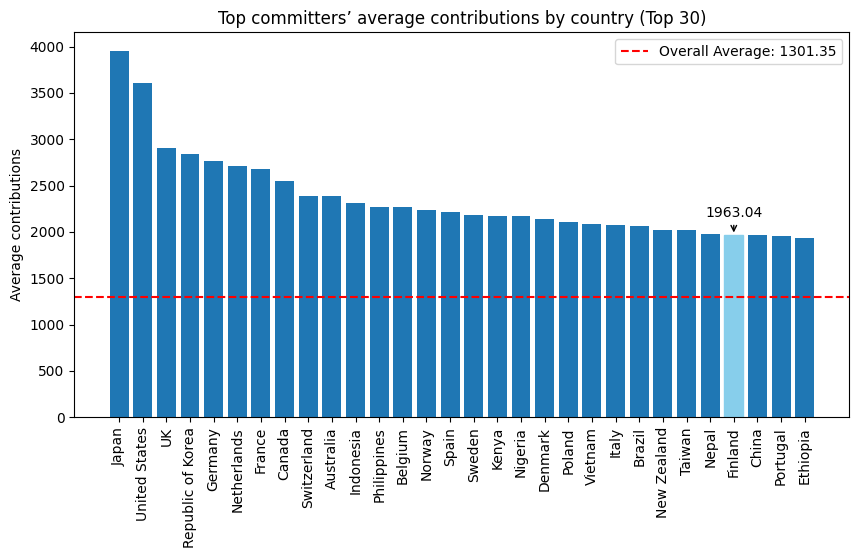

In [40]:
# Average contributes per country
avg = (
    filtered[filtered["rank_type"] == "private"]
    .groupby("country", as_index=False)["contribs"]
    .mean()
)

avg.sort_values(by="contribs", ascending=False, inplace=True)
avg.reset_index(drop=True, inplace=True)

avg.head()

fi_idx = avg[avg["country"] == "Finland"].index[0]
print(f"The top country is {avg.iloc[0]['country']} with an average of {avg.iloc[0]['contribs']:.2f} contributions.")
print(f"The bottom country is {avg.iloc[-1]['country']} with an average of {avg.iloc[-1]['contribs']:.2f} contributions.")
print(f"Finland is ranked #{fi_idx + 1} in average contributions per country.")

avg_top30 = avg.head(30)
plt.figure(figsize=(10, 5))
plt.bar(avg_top30["country"], avg_top30["contribs"])
plt.xticks(rotation=90)
plt.ylabel("Average contributions")
plt.title("Top committers’ average contributions by country (Top 30)")

plt.gca().patches[fi_idx].set_color("skyblue")
plt.gca().annotate(
    f"{avg.iloc[fi_idx]['contribs']:.2f}",
    xy=(fi_idx, avg.iloc[fi_idx]['contribs']),
    xytext=(fi_idx, avg.iloc[fi_idx]['contribs'] + 200),
    arrowprops=dict(facecolor='black', arrowstyle='->'),
    ha='center'
)

avg_mean = avg["contribs"].mean()

# also show the average line
plt.axhline(y=avg_mean, color='r', linestyle='--', label=f"Overall Average: {avg_mean:.2f}")
plt.legend()
plt.show()

The top country is Chad with a public contributions percentage of 79.84%.
The bottom country is Iraq with a public contributions percentage of 10.78%.
Finland is ranked #25 in public contributions percentage.


Text(0.5, 1.0, 'Top committers’ public contributions percentage by country (Top 30)')

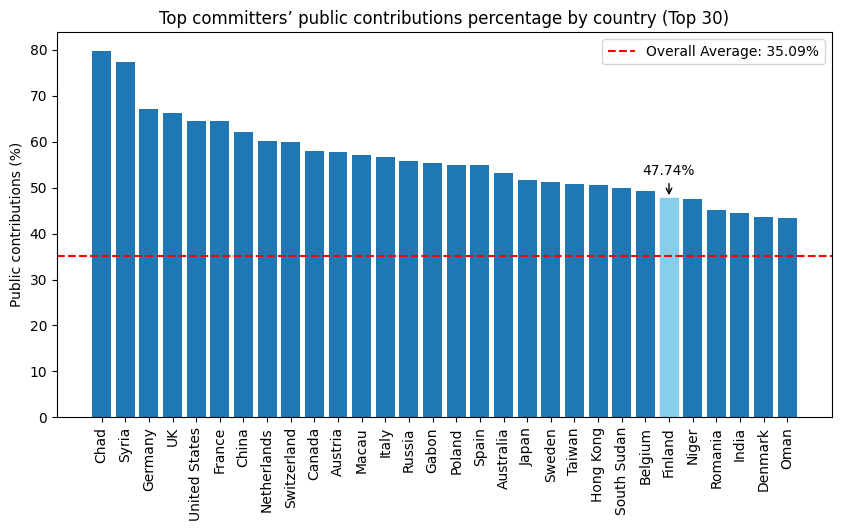

In [41]:
# Public contributions vs All contributions
public_sum_by_country = (
    filtered[filtered["rank_type"] == "public"].groupby("country")["contribs"].sum()
)

all_sum_by_country = (
    filtered[filtered["rank_type"] == "private"].groupby("country")["contribs"].sum()
)

ratio_by_country = (
    (public_sum_by_country / all_sum_by_country * 100)
    .dropna()
    .sort_values(ascending=False)
    .reset_index()
)

ratio_by_country.columns = ["country", "public_ratio"]

fi_idx = ratio_by_country[ratio_by_country["country"] == "Finland"].index[0]
print(
    f"The top country is {ratio_by_country.iloc[0]['country']} with a public contributions percentage of {ratio_by_country.iloc[0]['public_ratio']:.2f}%."
)
print(
    f"The bottom country is {ratio_by_country.iloc[-1]['country']} with a public contributions percentage of {ratio_by_country.iloc[-1]['public_ratio']:.2f}%."
)
print(f"Finland is ranked #{fi_idx + 1} in public contributions percentage.")

ratio_top30 = ratio_by_country.head(30)
plt.figure(figsize=(10, 5))
plt.bar(ratio_top30["country"], ratio_top30["public_ratio"])
plt.xticks(rotation=90)
plt.ylabel("Public contributions (%)")

# highlight Finland and annotate
plt.gca().patches[fi_idx].set_color("skyblue")
plt.gca().annotate(
    f"{ratio_by_country.iloc[fi_idx]['public_ratio']:.2f}%",
    xy=(fi_idx, ratio_by_country.iloc[fi_idx]["public_ratio"]),
    xytext=(fi_idx, ratio_by_country.iloc[fi_idx]["public_ratio"] + 5),
    arrowprops=dict(facecolor="black", arrowstyle="->"),
    ha="center",
)

avg_public_ratio = ratio_by_country["public_ratio"].mean()
plt.axhline(
    y=avg_public_ratio,
    color="r",
    linestyle="--",
    label=f"Overall Average: {avg_public_ratio:.2f}%",
)
plt.legend()
plt.title("Top committers’ public contributions percentage by country (Top 30)")

The top country is Malaysia with a commit to public contributions percentage of 94.82%.
The bottom country is Dominican Republic with a commit to public contributions percentage of 21.46%.
Finland is ranked #126 in commit to public contributions percentage.


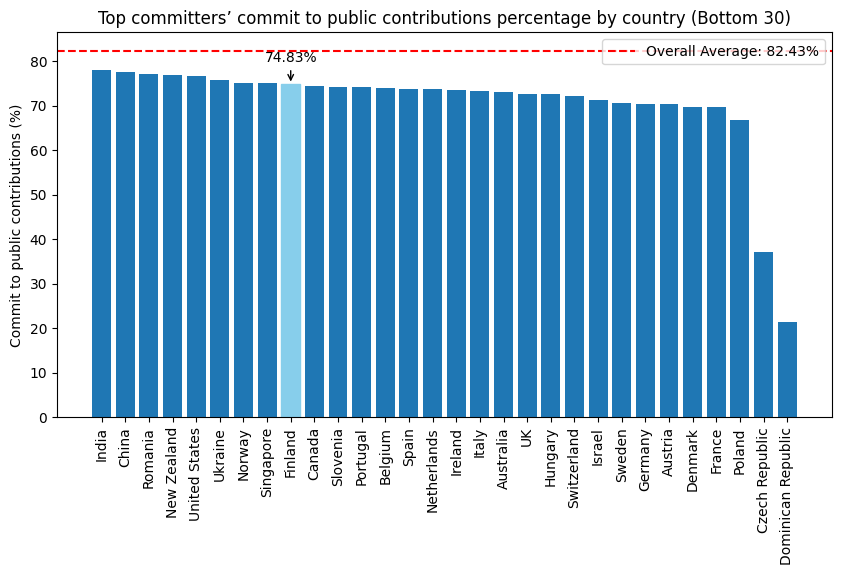

In [42]:
# Commits vs Contributions

commit_sum_by_country = (
    filtered[filtered["rank_type"] == "commit"].groupby("country")["contribs"].sum()
)

public_sum_by_country = (
    filtered[filtered["rank_type"] == "public"].groupby("country")["contribs"].sum()
)

ratio_commit_by_country = (
    (commit_sum_by_country / public_sum_by_country * 100)
    .dropna()
    .sort_values(ascending=False)
    .reset_index()
)

ratio_commit_by_country.columns = ["country", "commit_ratio"]
fi_idx = ratio_commit_by_country[ratio_commit_by_country["country"] == "Finland"].index[0]
print(f"The top country is {ratio_commit_by_country.iloc[0]['country']} with a commit to public contributions percentage of {ratio_commit_by_country.iloc[0]['commit_ratio']:.2f}%.")
print(f"The bottom country is {ratio_commit_by_country.iloc[-1]['country']} with a commit to public contributions percentage of {ratio_commit_by_country.iloc[-1]['commit_ratio']:.2f}%.")
print(f"Finland is ranked #{fi_idx + 1} in commit to public contributions percentage.")

ratio_commit_bottom30 = ratio_commit_by_country.tail(30)
plt.figure(figsize=(10, 5))
plt.bar(ratio_commit_bottom30["country"], ratio_commit_bottom30["commit_ratio"])
plt.xticks(rotation=90)
plt.ylabel("Commit to public contributions (%)")
# highlight Finland and annotate
plt.gca().patches[fi_idx - (len(ratio_commit_by_country) - 30)].set_color("skyblue")
plt.gca().annotate(
    f"{ratio_commit_by_country.iloc[fi_idx]['commit_ratio']:.2f}%",
    xy=(fi_idx - (len(ratio_commit_by_country) - 30), ratio_commit_by_country.iloc[fi_idx]["commit_ratio"]),
    xytext=(fi_idx - (len(ratio_commit_by_country) - 30), ratio_commit_by_country.iloc[fi_idx]["commit_ratio"] + 5),
    arrowprops=dict(facecolor="black", arrowstyle="->"),
    ha="center",
)
avg_commit_ratio = ratio_commit_by_country["commit_ratio"].mean()
plt.axhline(y=avg_commit_ratio, color='r', linestyle='--', label=f"Overall Average: {avg_commit_ratio:.2f}%")
plt.legend()
plt.title("Top committers’ commit to public contributions percentage by country (Bottom 30)")
plt.show()

In [43]:
# K-means cluster
from sklearn.cluster import KMeans

avg_committer_by_country = (
    filtered[filtered["rank_type"] == "private"]
    .groupby("country", as_index=False)["contribs"]
    .mean()
)

avg_public_contributor_by_country = (
    filtered[filtered["rank_type"] == "public"]
    .groupby("country", as_index=False)["contribs"]
    .mean()
)

avg_all_contributor_by_country = (
    filtered[filtered["rank_type"] == "commit"]
    .groupby("country", as_index=False)["contribs"]
    .mean()
)

merged = avg_committer_by_country.merge(
    avg_public_contributor_by_country, on="country", suffixes=("_private", "_public")
).merge(avg_all_contributor_by_country, on="country")
merged.rename(columns={"contribs": "contribs_commit"}, inplace=True)
merged["public_ratio"] = (
    merged["contribs_public"] / merged["contribs_private"] * 100
)
merged["commit_ratio"] = (
    merged["contribs_commit"] / merged["contribs_public"] * 100
)
merged.head()

,country,contribs_private,contribs_public,contribs_commit,public_ratio,commit_ratio
0,Afghanistan,1071.658824,215.550781,188.335938,20.113750,87.374277
1,Albania,702.396078,108.539062,94.714844,15.452686,87.263370
2,Algeria,1275.747036,290.347656,253.410156,22.759030,87.278182
3,Angola,890.286275,212.347656,185.863281,23.851615,87.527823
4,Argentina,1587.023529,612.160156,488.910156,38.572847,79.866380


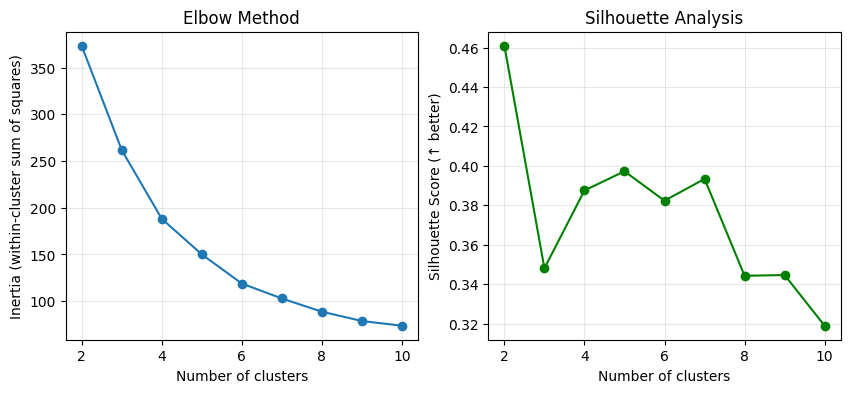

In [44]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

X = merged[["contribs_private", "contribs_public", "contribs_commit", "public_ratio", "commit_ratio"]].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertias = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)


plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(K_range, inertias, marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia (within-cluster sum of squares)")
plt.title("Elbow Method")
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, marker="o", color="green")
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score (↑ better)")
plt.title("Silhouette Analysis")
plt.grid(alpha=0.3)

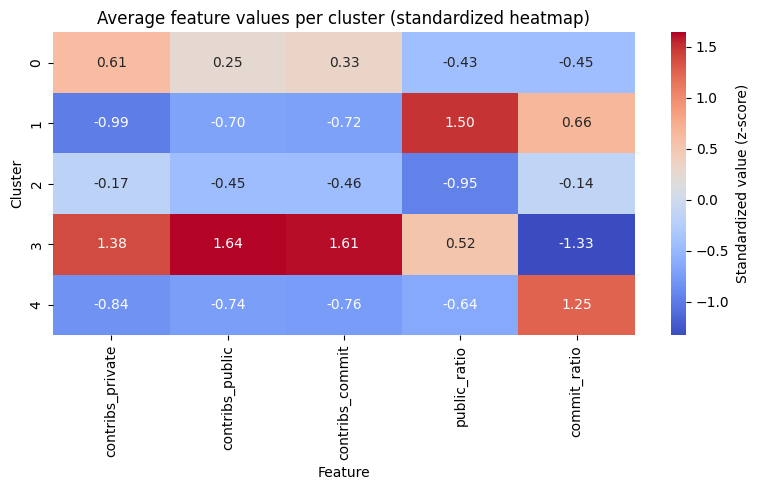

In [45]:
# Let's set k=5, as it seems a good balance
kmeans_5 = KMeans(n_clusters=5, random_state=42, n_init=10)
merged["cluster"] = kmeans_5.fit_predict(X_scaled)

import seaborn as sns

cluster_summary = (
    merged.groupby("cluster")[
        [
            "contribs_private",
            "contribs_public",
            "contribs_commit",
            "public_ratio",
            "commit_ratio",
        ]
    ]
    .mean()
    .round(2)
)

cluster_summary_scaled = (
    cluster_summary - cluster_summary.mean()
) / cluster_summary.std()

plt.figure(figsize=(8, 5))
sns.heatmap(
    cluster_summary_scaled,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar_kws={"label": "Standardized value (z-score)"},
)

plt.title("Average feature values per cluster (standardized heatmap)")
plt.ylabel("Cluster")
plt.xlabel("Feature")
plt.tight_layout()
plt.show()

In [46]:
# Output result

clustered_finland = merged.loc[merged["country"] == "Finland", ["country", "cluster"]]

print(f"Finland is in cluster {clustered_finland.iloc[0]['cluster']} with the following stats:")

cluster_summary.loc[merged.loc[merged["country"] == "Finland", "cluster"].iloc[0]]

# print out the countries in the same cluster as Finland
same_cluster_countries = merged[merged["cluster"] == clustered_finland.iloc[0]["cluster"]]["country"].tolist()
print(f"Countries in the same cluster as Finland: {', '.join(same_cluster_countries)}")

Finland is in cluster 0 with the following stats:
Countries in the same cluster as Finland: Argentina, Bangladesh, Brazil, Bulgaria, Chile, Colombia, Denmark, Egypt, Estonia, Ethiopia, Finland, Ghana, Greece, Hong Kong, Hungary, India, Indonesia, Iran, Ireland, Israel, Kenya, Mexico, Morocco, Nepal, New Zealand, Nigeria, Norway, Pakistan, Philippines, Portugal, Romania, Russia, Rwanda, Serbia, Singapore, South Africa, Sri Lanka, Taiwan, Thailand, Turkey, UAE, Uganda, Ukraine, Vietnam


In [49]:
# visual
import plotly.express as px

fig = px.choropleth(
    merged,
    locations="country",
    locationmode="country names",
    color="cluster",
    title="Committers Cluster by Country",
)
fig.show()

fig.write_html("./visual/clusters_map.html", include_plotlyjs="cdn")

/var/folders/5w/l58qmhqx3yxgqfy26kvp4b380000gn/T/ipykernel_48826/2629650043.py:4: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.

